In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

# Black-Scholes pricing

### Trajectory test

In [31]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

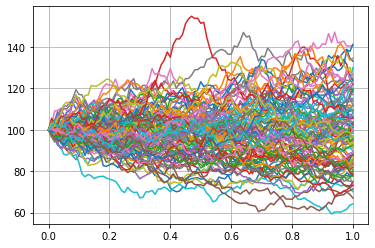

In [32]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [6]:
autocall = MonteCarlo(rate=.03, q=0.1, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [7]:
bs_model = BSPath(r=.03, sigma=.25, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [8]:
autocall.valuation(traj)

72.50% hit the barrier and the put is exercised 6.61% of the time
Barrier breach at time:
- 0.25 years: 15.74% of the time
- 0.5 years: 14.18% of the time
- 0.75 years: 15.34% of the time
- 1.0 years: 27.25% of the time


(102.086904569093, 0.0310916746663977)

### Variation with the spot

In [15]:
spots = np.linspace(10, 300, 50)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=S0, freq=.25, mat=1, put_strike=.7*S0, notional=100)
    bs_model = BSPath(r=.03, sigma=.40, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

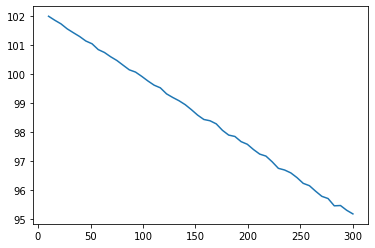

In [16]:
plt.plot(spots, prices[::, 0])

### Variation with the volatility

In [9]:
vols = np.linspace(.05, .5, 50)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.2, barrier=100, freq=.25, mat=1, put_strike=60, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

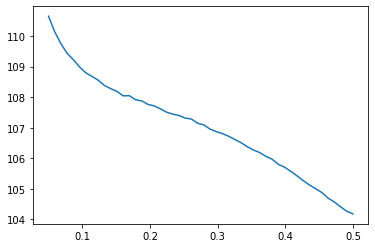

In [10]:
plt.plot(vols, prices[::, 0])

In [11]:
qs = np.linspace(.04, .20, 20)
prices = []
for qp in qs:
    autocall = MonteCarlo(rate=.03, q=qp, barrier=100, freq=.25, mat=1, put_strike=80, notional=100)
    bs_model = BSPath(r=.03, sigma=.2, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

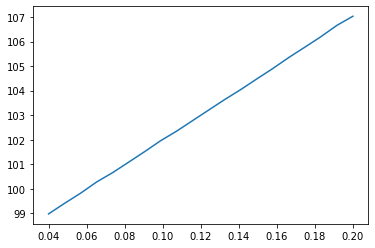

In [12]:
plt.plot(qs, prices[::, 0])

# Heston pricing

### Trajectory test

In [29]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.01)
traj = heston_model.simulation(100, 1/100, 100)

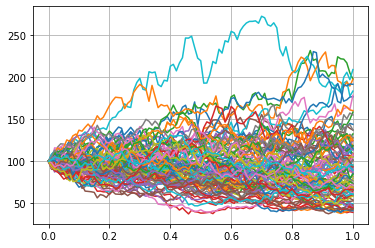

In [30]:
plt.plot(np.arange(101)/100, traj)
plt.grid();

### Autocallable pricing